# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [175]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [177]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [178]:
#顯示nan的資料
df1 = df[df.isna().any(axis=1)]
print(df1)

     Pclass  Age  SibSp  Parch     Fare
5         3  NaN      0      0   8.4583
17        2  NaN      0      0  13.0000
19        3  NaN      0      0   7.2250
26        3  NaN      0      0   7.2250
28        3  NaN      0      0   7.8792
..      ...  ...    ...    ...      ...
408       3  NaN      0      0   7.7208
410       3  NaN      0      0   7.7500
413       3  NaN      0      0   8.0500
416       3  NaN      0      0   8.0500
417       3  NaN      1      1  22.3583

[264 rows x 5 columns]


In [179]:
df2 = df.describe()
print(df2)

            Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200


AxesSubplot(0.125,0.125;0.775x0.755)


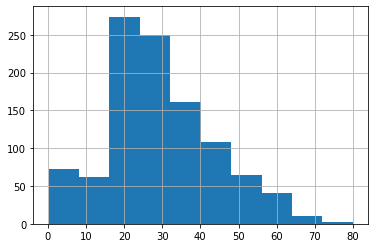

In [180]:
#大多NA值為年齡 因此檢查年齡的資料分布 (右偏)
print(df['Age'].hist()) 

# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

In [181]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6981796497395015

In [182]:
# 空值補平均值
df_mn = df.fillna(df.mean())
train_X = df_mn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6947900320130562

In [183]:
# 空值補中位數
df_mdn = df.fillna(df.median())
train_X = df_mdn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6947837549431924

In [184]:
# 空值補 0
df_0 = df.fillna(0)
train_X = df_0[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6992969681752557

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [185]:
"""
Your Code Here
"""
# 空值補 -1, 標準化之後 做羅吉斯迴歸
df_m1 = df.fillna(-1)
df_m1 = StandardScaler().fit_transform(df_m1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6981733726696377

In [186]:
# 空值補 -1, 做最大最小化之後 做羅吉斯迴歸
df_m1 = df.fillna(-1)
df_m1 = MinMaxScaler().fit_transform(df_m1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970560542338836

In [187]:
# 空值補平均值, 標準化之後 做羅吉斯迴歸
df_mn = df.fillna(df.mean())
df_mn = StandardScaler().fit_transform(df_mn)
train_X = df_mn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6959136275186741

In [188]:
# 空值補平均值, 做最大最小化之後 做羅吉斯迴歸
df_mn = df.fillna(df.mean())
df_mn = MinMaxScaler().fit_transform(df_mn)
train_X = df_mn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7004142866110099

In [189]:
# 空值補中位數, 標準化之後 做羅吉斯迴歸
df_mdn = df.fillna(df.median())
df_mdn = StandardScaler().fit_transform(df_mdn)
train_X = df_mdn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970309459544284

In [190]:
# 空值補中位數, 做最大最小化之後 做羅吉斯迴歸
df_mdn = df.fillna(df.median())
df_mdn = MinMaxScaler().fit_transform(df_mdn)
train_X = df_mdn[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7015316050467642

In [191]:
# 空值補 0, 標準化之後 做羅吉斯迴歸
df_0 = df.fillna(0)
df_0 = StandardScaler().fit_transform(df_0)
train_X = df_0[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6981733726696377

In [192]:
# 空值補 0, 做最大最小化之後 做羅吉斯迴歸
df_0 = df.fillna(0)
df_0 = MinMaxScaler().fit_transform(df_0)
train_X = df_0[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7015378821166279

In [193]:
##### ans:補0與中位數的效果類似，但是絕大多數的遺漏值是屬於年齡欄位，且年齡欄位中有離群值(80歲)，
#### 整個平均分布屬右偏，此時選擇補中位數會是比較好的選擇(0雖然可能是默認成年齡不詳，但是以此資料而言0歲在此可能是真的有其遇難者)。
#### 另外死亡年齡在統計上屬於均勻分布，因此採用最大最小化也是會優於標準化。